In [1]:
from mmseg.apis import init_segmentor, inference_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import os

In [2]:
# useful tools
def load_img(path):
    img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    img = img.astype('float32') # original is uint16
    img = (img - img.min())/(img.max() - img.min())*255.0 # scale image to [0, 255]
    img = img.astype('uint8')
    return img

def show_img(img, mask=None):
    # clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
   #  img = clahe.apply(img)
#     plt.figure(figsize=(10,10))
    plt.imshow(img, cmap='bone')
    
    if mask is not None:
        # plt.imshow(np.ma.masked_where(mask!=1, mask), alpha=0.5, cmap='autumn')
        plt.imshow(mask, alpha=0.5)
    plt.axis('off')

In [3]:
config_file = '../cache/upernet_swin_base_patch4_window7_512x512_80k_FTU_whole_multilabel/upernet_swin_base_patch4_window7_512x512_80k_FTU_whole_multilabel.py'
checkpoint_file = '../cache/upernet_swin_base_patch4_window7_512x512_80k_FTU_whole_multilabel/best_mDice_iter_40000.pth'

In [4]:
# build the model from a config file and a checkpoint file
model = init_segmentor(config_file, checkpoint_file, device='cuda:0')

/home/zhangzr/mmsegmentation_kaggle/mmseg/models/losses/cross_entropy_loss.py:242: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


load checkpoint from local path: ../cache/upernet_swin_base_patch4_window7_512x512_80k_FTU_whole_multilabel/best_mDice_iter_40000.pth


In [5]:
# test a single image
# img_path = '../input/uw-madison-gi-tract-image-segmentation/train/case123/case123_day20/scans/slice_0099_266_266_1.50_1.50.png'
img_path = '../data/hubmap-organ-segmentation/train_images/5552.tiff'
gt_file_path = '../data/hubmap-organ-segmentation/train_masks_multi_label/5552.png'
result = inference_segmentor(model, img_path)

(array([0, 5]), array([8984505,   15495]))


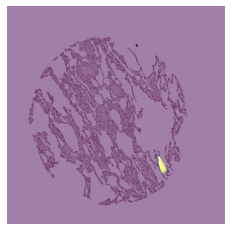

In [9]:
# show the results
processed_img = load_img(img_path)
res = result[0]

show_img(processed_img, res)
print(np.unique(res, return_counts=True))

(array([0, 5], dtype=uint8), array([8982308,   17692]))


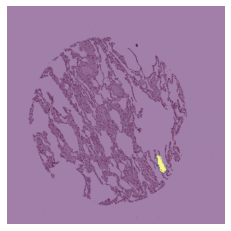

In [11]:
# show gt
gt = cv2.imread(gt_file_path, cv2.IMREAD_UNCHANGED)
show_img(processed_img, gt)
print(np.unique(gt, return_counts=True))